<a href="https://www.kaggle.com/code/muhammadukasha09/digital-image-processing-lab-06?scriptVersionId=206685000" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
pip install opencv-python numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2

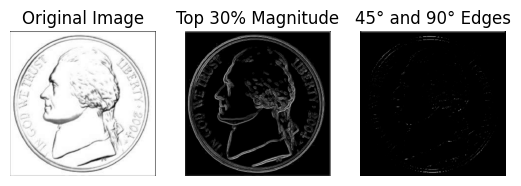

(array([[  0.        , 192.        , 136.        , ..., 108.        ,
          58.        ,   0.        ],
        [398.        , 394.18269876, 355.84828228, ..., 261.81672979,
         127.91403363,   0.        ],
        [718.        , 719.92360706, 716.61007529, ..., 578.55336832,
         289.08476266,  92.        ],
        ...,
        [112.        , 154.56390264, 176.79932127, ..., 681.30756638,
         390.97826027,  76.        ],
        [ 62.        , 112.80070922, 145.77379737, ..., 630.22694325,
         358.09495947,   0.        ],
        [  0.        ,  84.        , 124.        , ..., 608.        ,
         344.        ,   0.        ]]),
 array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
        [398.,   0.,   0., ...,   0.,   0.,   0.],
        [718.,   0.,   0., ...,   0.,   0.,  92.],
        ...,
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.],
        [  0.,   0.,   0., ...,   0.,   0.,   0.]]))

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)  
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)  

    magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
    top_30_threshold = np.percentile(magnitude, 70)
    top_30_magnitude = np.where(magnitude >= top_30_threshold, magnitude, 0)

    phase = np.arctan2(sobel_y, sobel_x) * (180 / np.pi)
    mask_45_90 = (np.abs(phase - 45) < 5) | (np.abs(phase - 90) < 5)

    plt.subplot(1, 3, 1), plt.imshow(gray, cmap='gray')
    plt.title("Original Image"), plt.axis("off")
    
    plt.subplot(1, 3, 2), plt.imshow(top_30_magnitude, cmap='gray')
    plt.title("Top 30% Magnitude"), plt.axis("off")

    phase_45_90 = np.where(mask_45_90 & (magnitude >= top_30_threshold), magnitude, 0)
    plt.subplot(1, 3, 3), plt.imshow(phase_45_90, cmap='gray')
    plt.title("45° and 90° Edges"), plt.axis("off")

    plt.show()

    return top_30_magnitude, phase_45_90

image = cv2.imread("/kaggle/input/labtask1/pic1.png")  
apply_sobel(image)